# Análisis y Tratamiento de Datos
## Mi primer cuaderno :)
### Christian Camilo Quijano Carrillo
### 2182091

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
#Espectros IR
uIR1=('https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/IR1.CSV')
uIR2=('https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/IR2.CSV')
uIR3=('https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/IR3.CSV')
IR1 = pd.read_csv(uIR1, sep=',', header=None)
IR2 = pd.read_csv(uIR2,sep=',', header=None)
IR3 = pd.read_csv(uIR3,sep=',', header=None)

#Espectro masas
uM1=('https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/MS.txt')
uM2=('https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/MS2.txt')
uM3=('https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/MS3.txt')
#Lectura con pandas
M1 = pd.read_csv(uM1, sep=' ', header=None)
M2 = pd.read_csv(uM2, sep=' ', header=None)
M3 = pd.read_csv(uM3, sep=' ', header=None)

In [3]:
#1 = 'Columns'
#Inplace=True, para guardar en la variable
IR1.set_axis(['No1', 'T1'], axis=1, inplace=True)
IR1

,No1,T1
0,399.6813,0.00000
1,400.1635,75.84647
2,400.6456,76.13815
3,401.1277,76.36040
4,401.6098,76.57709
...,...,...
7464,3998.2590,99.40793
7465,3998.7410,99.40759
7466,3999.2240,99.40717
7467,3999.7060,99.40642


In [4]:
IR2.set_axis(['No2', 'T2'], axis=1, inplace=True)
IR2

,No2,T2
0,399.6813,0.00000
1,400.1635,77.60327
2,400.6456,77.72319
3,401.1277,77.77132
4,401.6098,77.82449
...,...,...
7464,3998.2590,99.40846
7465,3998.7410,99.40794
7466,3999.2240,99.40787
7467,3999.7060,99.40830


In [5]:
IR3.set_axis(['No3', 'T3'], axis=1, inplace=True)
IR3

,No3,T3
0,399.6813,0.00000
1,400.1635,84.54559
2,400.6456,84.58085
3,401.1277,84.66300
4,401.6098,84.79237
...,...,...
7464,3998.2590,99.38236
7465,3998.7410,99.38454
7466,3999.2240,99.38631
7467,3999.7060,99.38711


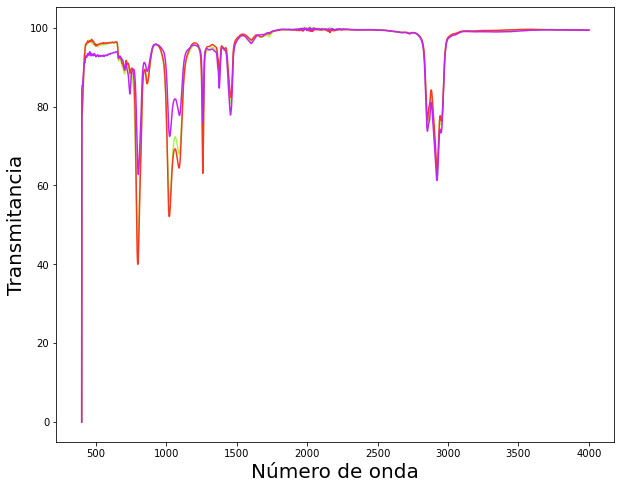

In [6]:
plt.figure(figsize=(10,8))
plt.plot(IR1['No1'],IR1['T1'], color="#ACF64A")
plt.plot(IR2['No2'],IR2['T2'], color="#F53A24")
plt.plot(IR3['No3'],IR3['T3'], color="#BF26F5")
plt.xlabel("Número de onda", fontsize=20)
plt.ylabel("Transmitancia", fontsize=20)
plt.show()


In [8]:
M1.set_axis(['M1x', 'I1'], axis=1, inplace=True)
M2.set_axis(['M2x', 'I2'], axis=1, inplace=True)
M3.set_axis(['M3x', 'I3'], axis=1, inplace=True)

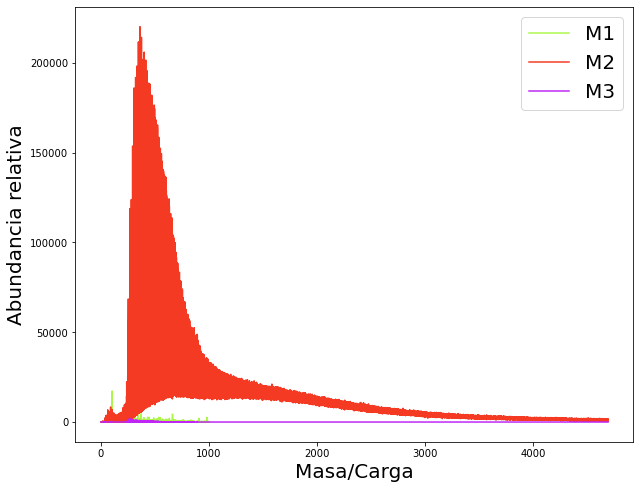

In [9]:
plt.figure(figsize=(10,8))
plt.plot(M1['M1x'],M1['I1'],label='M1', color="#ACF64A")
plt.plot(M2['M2x'],M2['I2'],label='M2', color="#F53A24")
plt.plot(M3['M3x'],M3['I3'],label='M3', color="#BF26F5")
plt.legend(loc='best', fontsize=20)
plt.xlabel("Masa/Carga", fontsize=20)
plt.ylabel("Abundancia relativa", fontsize=20)
plt.show()


In [10]:
IRT = pd.concat([IR1, IR2[["T2"]], IR3[["T3"]]], axis=1, ignore_index=True)
IRT.set_axis(['Wn', 'T1', 'T2','T3'], axis=1, inplace=True)
IRT

,Wn,T1,T2,T3
0,399.6813,0.00000,0.00000,0.00000
1,400.1635,75.84647,77.60327,84.54559
2,400.6456,76.13815,77.72319,84.58085
3,401.1277,76.36040,77.77132,84.66300
4,401.6098,76.57709,77.82449,84.79237
...,...,...,...,...
7464,3998.2590,99.40793,99.40846,99.38236
7465,3998.7410,99.40759,99.40794,99.38454
7466,3999.2240,99.40717,99.40787,99.38631
7467,3999.7060,99.40642,99.40830,99.38711


In [11]:
MST = pd.concat([M1, M2[["I2"]], M3[["I3"]]], axis=1, ignore_index=True)
MST.set_axis(['m/z', 'I1', 'I2','I3'], axis=1, inplace=True)
MST

,m/z,I1,I2,I3
0,80.0,7.0,0,0
1,80.1,3.0,0,0
2,80.3,3.0,0,0
3,80.4,95.0,0,0
4,80.5,519.0,0,0
...,...,...,...,...
414203,NaN,NaN,906,0
414204,NaN,NaN,844,0
414205,NaN,NaN,1082,0
414206,NaN,NaN,1334,0


In [12]:
writer = pd.ExcelWriter('pandas_multiple.xlsx', engine='xlsxwriter')

# Escribir cada Dataframe en una hoja de calculo
IRT.to_excel(writer, sheet_name='IRTotal')
MST.to_excel(writer, sheet_name='MSTotal')

# Cerrar el pandas en excel y guardarlo
writer.save()

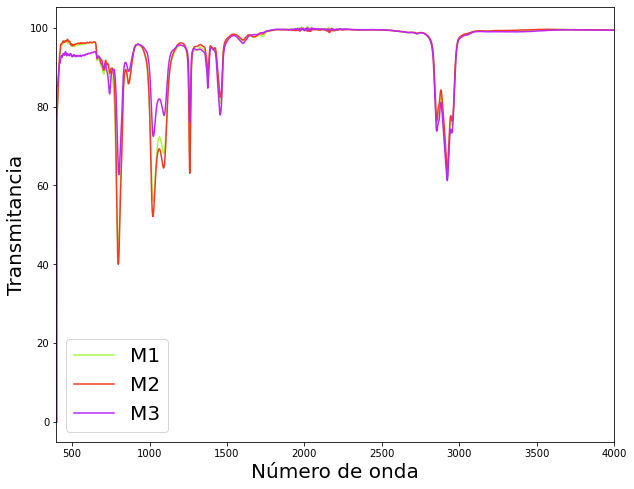

In [17]:
plt.figure(figsize=(10,8))
plt.plot(IRT['Wn'],IRT['T1'],label='M1', color="#ACF64A")
plt.plot(IRT['Wn'],IRT['T2'],label='M2', color="#F53A24")
plt.plot(IRT['Wn'],IRT['T3'],label='M3', color="#BF26F5")
plt.legend(loc='best', fontsize=20)
plt.xlabel("Número de onda", fontsize=20)
plt.ylabel("Transmitancia", fontsize=20)
plt.xlim(398, 4000)
plt.show()

In [14]:
CCR = pd.read_excel("https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/Supplementary_CCR.xlsx")

In [25]:
df1 = pd.read_excel("https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/Supplementary_CCR.xlsx",sheet_name='spectra')
df2 = pd.read_excel("https://github.com/emejiao/Analisis_Datos_Quimica/raw/main/Datos/Supplementary_CCR.xlsx",sheet_name='properties')
df1, df2

(      Molecules\Samples     CR1     CR2     CR3     CR4     CR5     CR6  \
 0         C18H30         16.122  28.754  11.208  24.784   2.360   2.252   
 1         C19H28         30.101  35.596  18.767  36.845  10.718   7.076   
 2         C20H26         38.500  54.152  30.508  55.708  25.710  16.029   
 3         C20H30         31.574  43.425  27.087  41.362  43.697  36.075   
 4         C21H26         52.324  62.510  40.397  57.982  37.720  24.171   
 ...                 ...     ...     ...     ...     ...     ...     ...   
 59687     C72H22O1        0.000   0.000   0.000   0.000   0.000   1.506   
 59688     C63H128S2       0.000   0.000   0.000   0.000   0.000   2.188   
 59689     C72H143N1       0.000   0.000   0.000   0.000   0.000   0.000   
 59690     C66H74O1        0.000   0.000   0.000   0.000   0.000   0.000   
 59691     C88H30O1        0.000   0.000   0.000   0.000   0.000   0.000   
 
           CR7     CR8     CR9  ...  VR10  VR11  VR12  VR13  VR14  VR15  VR16  \
 0   

In [27]:
df1ex = df1[["Molecules\Samples","CR1","VR1"]]
df2ex = df2[["Samples","CCR (wt%)"]]

In [28]:
ExcelM1 = pd.ExcelWriter('ExcelM1.xlsx', engine='xlsxwriter')

# Escribir cada Dataframe en una hoja de calculo
df1ex.to_excel(ExcelM1, sheet_name='Sup MS1')

# Cerrar el pandas en excel y guardarlo
ExcelM1.save()

In [29]:
ExcelM2 = pd.ExcelWriter('ExcelM2.xlsx', engine='xlsxwriter')

# Escribir cada Dataframe en una hoja de calculo
df2ex.to_excel(ExcelM2, sheet_name='Sup MS2')

# Cerrar el pandas en excel y guardarlo
ExcelM2.save()